# Exercise 5 : Classification Tree
### Problems
#### Problem 1 : Predicting CentralAir using SalePrice
#### In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.
#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.
#### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?


In [36]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [37]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Simple Tree

Response: CentralAir

Predictor: SalePrice

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082
False Positive Rate 		: 0.8571428571428571
True Positive Rate 		: 0.998166819431714

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9452054794520548
False Positive Rate 		: 0.8888888888888888
True Positive Rate 		: 1.0



<AxesSubplot:>

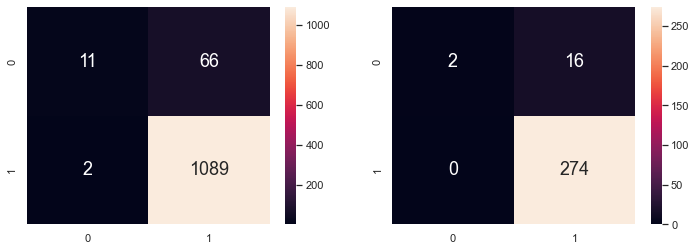

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
SalePrice = pd.DataFrame(housedata['SalePrice'])

# split into train & test
X_train1, X_test1, y_train1, y_test1 = train_test_split(SalePrice, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree1 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree1.fit(X_train1, y_train1)                  # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred1 = dectree1.predict(X_train1)
y_test_pred1 = dectree1.predict(X_test1)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train1, y_train1))
TN_train1 = confusion_matrix(y_train1, y_train_pred1)[0][0]
FP_train1 = confusion_matrix(y_train1, y_train_pred1)[0][1]
FN_train1 = confusion_matrix(y_train1, y_train_pred1)[1][0]
TP_train1 = confusion_matrix(y_train1, y_train_pred1)[1][1]

FPRate_train1 = FP_train1 / (TN_train1 + FP_train1)
FNRate_train1 = FN_train1 / (TP_train1 + FN_train1)
print("False Positive Rate \t\t:", FPRate_train1)
print("True Positive Rate \t\t:", 1 - FNRate_train1)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test1, y_test1))
TN_test1 = confusion_matrix(y_test1, y_test_pred1)[0][0]
FP_test1 = confusion_matrix(y_test1, y_test_pred1)[0][1]
FN_test1 = confusion_matrix(y_test1, y_test_pred1)[1][0]
TP_test1 = confusion_matrix(y_test1, y_test_pred1)[1][1]

FPRate_test1 = FP_test1 / (TN_test1 + FP_test1)
FNRate_test1 = FN_test1 / (TP_test1 + FN_test1)
print("False Positive Rate \t\t:", FPRate_test1)
print("True Positive Rate \t\t:", 1 - FNRate_test1)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




In [39]:
CentralAir.head()

,CentralAir
0,Y
1,Y
2,Y
3,Y
4,Y


[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.493\nsamples = 86\nvalue = [38, 48]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.459\nsamples = 73\nvalue = [26, 47]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.069\nsamples = 1082\nvalue = [39, 1043]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.176\nsamples = 288\nvalue = [28, 260]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.027\nsamples = 794\nvalue = [11, 783]\nclass = Yes')]

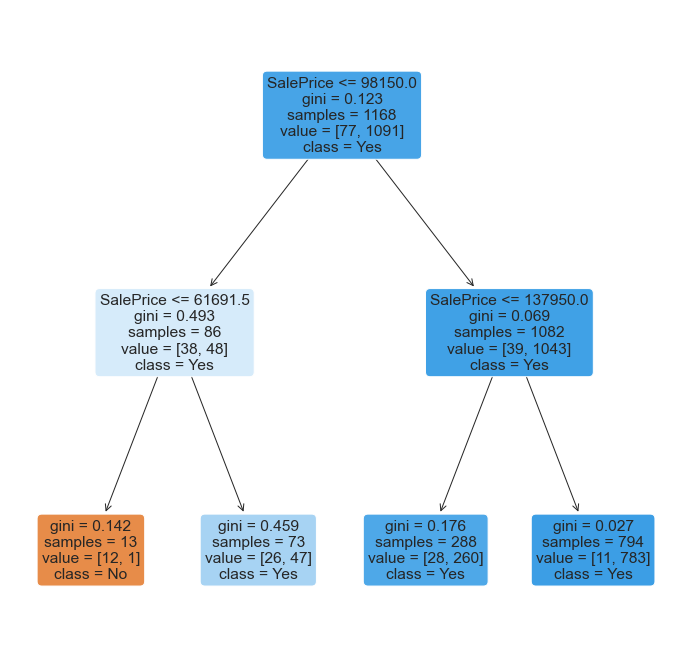

In [40]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

DecisionTreeClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9477739726027398
False Positive Rate 		: 0.8142857142857143
True Positive Rate 		: 0.9963570127504554

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9178082191780822
False Positive Rate 		: 0.84
True Positive Rate 		: 0.9887640449438202



<AxesSubplot:>

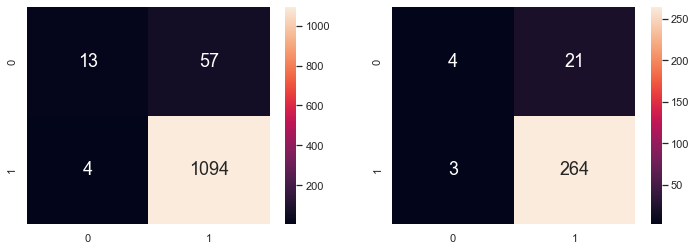

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
SalePrice = pd.DataFrame(housedata['SalePrice'])

# split into train & test
X_train2, X_test2, y_train2, y_test2 = train_test_split(SalePrice, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree2 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree2.fit(X_train2, y_train2)                  # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred2 = dectree2.predict(X_train2)
y_test_pred2 = dectree2.predict(X_test2)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X_train2, y_train2))
TN_train2 = confusion_matrix(y_train2, y_train_pred2)[0][0]
FP_train2 = confusion_matrix(y_train2, y_train_pred2)[0][1]
FN_train2 = confusion_matrix(y_train2, y_train_pred2)[1][0]
TP_train2 = confusion_matrix(y_train2, y_train_pred2)[1][1]

FPRate_train2 = FP_train2 / (TN_train2 + FP_train2)
FNRate_train2 = FN_train2 / (TP_train2 + FN_train2)
print("False Positive Rate \t\t:", FPRate_train2)
print("True Positive Rate \t\t:", 1 - FNRate_train2)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X_test2, y_test2))
TN_test2 = confusion_matrix(y_test2, y_test_pred2)[0][0]
FP_test2 = confusion_matrix(y_test2, y_test_pred2)[0][1]
FN_test2 = confusion_matrix(y_test2, y_test_pred2)[1][0]
TP_test2 = confusion_matrix(y_test2, y_test_pred2)[1][1]

FPRate_test2 = FP_test2 / (TN_test2 + FP_test2)
FNRate_test2 = FN_test2 / (TP_test2 + FN_test2)
print("False Positive Rate \t\t:", FPRate_test2)
print("True Positive Rate \t\t:", 1 - FNRate_test2)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train2, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test2, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




[Text(321.408, 587.0880000000001, 'SalePrice <= 107700.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Yes'),
 Text(147.312, 456.624, 'SalePrice <= 61691.5\ngini = 0.467\nsamples = 124\nvalue = [46, 78]\nclass = Yes'),
 Text(53.568000000000005, 326.1600000000001, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = No'),
 Text(26.784000000000002, 195.69600000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Text(80.352, 195.69600000000003, 'SalePrice <= 52250.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = No'),
 Text(53.568000000000005, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(107.13600000000001, 65.23200000000008, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = No'),
 Text(241.056, 326.1600000000001, 'SalePrice <= 106125.0\ngini = 0.432\nsamples = 111\nvalue = [35, 76]\nclass = Yes'),
 Text(187.48800000000003, 195.69600000000003, 'SalePrice <= 78500.0\ngini = 0.418\nsamples = 104\nvalu

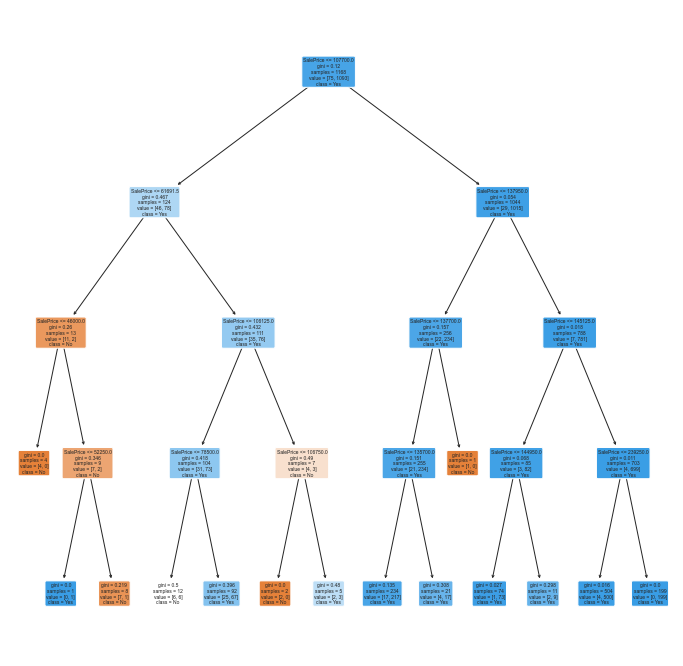

In [133]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

# Problem 2 : Predicting CentralAir using Other Variables
#### Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) topredict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do classification on variable(s) in a given dataset.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375
False Positive Rate 		: 0.8571428571428571
False Negative Rate 		: 0.006416131989000917

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014
False Positive Rate 		: 0.7222222222222222
False Negative Rate 		: 0.0072992700729927005



<AxesSubplot:>

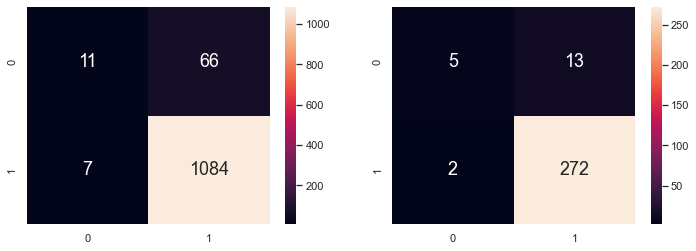

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
OverallQual = pd.DataFrame(housedata['OverallQual'])

# split into train & test
X_train3, X_test3, y_train3, y_test3 = train_test_split(OverallQual, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree3 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree3.fit(X_train3, y_train3)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred3 = dectree3.predict(X_train3)
y_test_pred3 = dectree3.predict(X_test3)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X_train3, y_train3))
TN_train3 = confusion_matrix(y_train3, y_train_pred3)[0][0]
FP_train3 = confusion_matrix(y_train3, y_train_pred3)[0][1]
FN_train3 = confusion_matrix(y_train3, y_train_pred3)[1][0]
TP_train3 = confusion_matrix(y_train3, y_train_pred3)[1][1]

FPRate_train3 = FP_train3 / (TN_train3 + FP_train3)
FNRate_train3 = FN_train3 / (TP_train3 + FN_train3)
print("False Positive Rate \t\t:", FPRate_train3)
print("False Negative Rate \t\t:", FNRate_train3)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X_test3, y_test3))
TN_test3 = confusion_matrix(y_test3, y_test_pred3)[0][0]
FP_test3 = confusion_matrix(y_test3, y_test_pred3)[0][1]
FN_test3 = confusion_matrix(y_test3, y_test_pred3)[1][0]
TP_test3 = confusion_matrix(y_test3, y_test_pred3)[1][1]

FPRate_test3 = FP_test3 / (TN_test3 + FP_test3)
FNRate_test3 = FN_test3 / (TP_test3 + FN_test3)
print("False Positive Rate \t\t:", FPRate_test3)
print("False Negative Rate \t\t:", FNRate_test3)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train3, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test3, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(243.4909090909091, 587.0880000000001, 'OverallQual <= 3.5\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Yes'),
 Text(121.74545454545455, 456.624, 'OverallQual <= 2.5\ngini = 0.475\nsamples = 18\nvalue = [11, 7]\nclass = No'),
 Text(60.872727272727275, 326.1600000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(182.61818181818182, 326.1600000000001, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]\nclass = No'),
 Text(365.23636363636365, 456.624, 'OverallQual <= 4.5\ngini = 0.108\nsamples = 1150\nvalue = [66, 1084]\nclass = Yes'),
 Text(304.3636363636364, 326.1600000000001, 'gini = 0.323\nsamples = 94\nvalue = [19, 75]\nclass = Yes'),
 Text(426.1090909090909, 326.1600000000001, 'OverallQual <= 6.5\ngini = 0.085\nsamples = 1056\nvalue = [47, 1009]\nclass = Yes'),
 Text(304.3636363636364, 195.69600000000003, 'OverallQual <= 5.5\ngini = 0.128\nsamples = 612\nvalue = [42, 570]\nclass = Yes'),
 Text(243.4909090909091, 65.23200000000008, 'gini = 0.148\nsampl

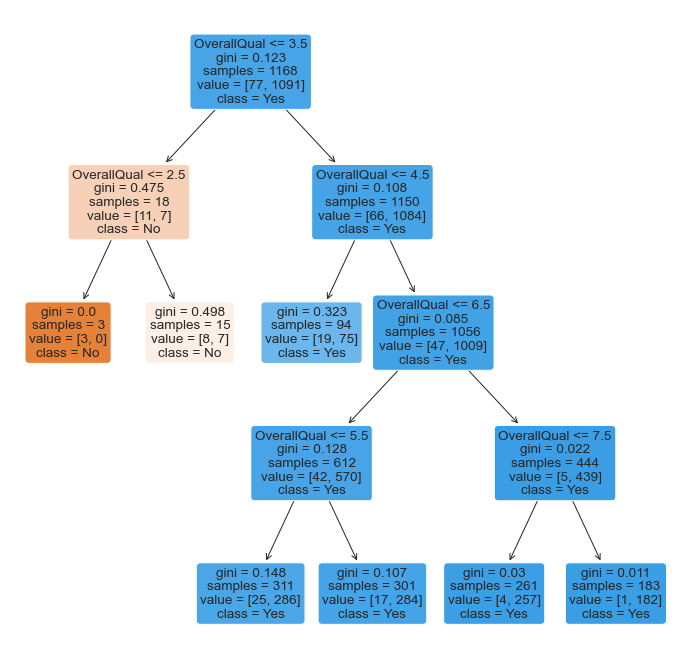

In [44]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["No","Yes"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9323630136986302
False Positive Rate 		: 0.9512195121951219
False Negative Rate 		: 0.0009208103130755065

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.952054794520548
False Positive Rate 		: 0.9230769230769231
False Negative Rate 		: 0.007168458781362007



<AxesSubplot:>

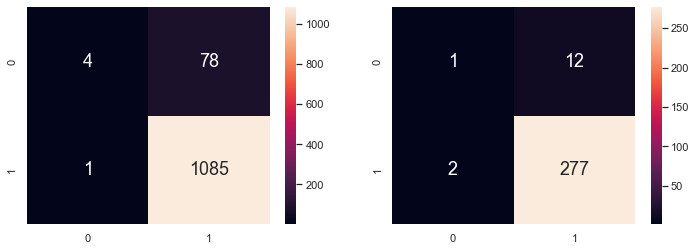

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# get the dataset Central Air and SalePrice

CentralAir = pd.DataFrame(housedata['CentralAir'])
YearBuilt = pd.DataFrame(housedata['YearBuilt'])

# split into train & test
X_train4, X_test4, y_train4, y_test4 = train_test_split(YearBuilt, CentralAir, test_size = 0.20)

# Create DecisionTree using Train data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(X_train4, y_train4)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred4 = dectree4.predict(X_train4)
y_test_pred4 = dectree4.predict(X_test4)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X_train4, y_train4))
TN_train4 = confusion_matrix(y_train4, y_train_pred4)[0][0]
FP_train4 = confusion_matrix(y_train4, y_train_pred4)[0][1]
FN_train4 = confusion_matrix(y_train4, y_train_pred4)[1][0]
TP_train4 = confusion_matrix(y_train4, y_train_pred4)[1][1]

FPRate_train4 = FP_train4 / (TN_train4 + FP_train4)
FNRate_train4 = FN_train4 / (TP_train4 + FN_train4)
print("False Positive Rate \t\t:", FPRate_train4)
print("False Negative Rate \t\t:", FNRate_train4)

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X_test4, y_test4))
TN_test4 = confusion_matrix(y_test4, y_test_pred4)[0][0]
FP_test4 = confusion_matrix(y_test4, y_test_pred4)[0][1]
FN_test4 = confusion_matrix(y_test4, y_test_pred4)[1][0]
TP_test4 = confusion_matrix(y_test4, y_test_pred4)[1][1]

FPRate_test4 = FP_test4 / (TN_test4 + FP_test4)
FNRate_test4 = FN_test4 / (TP_test4 + FN_test4)
print("False Positive Rate \t\t:", FPRate_test4)
print("False Negative Rate \t\t:", FNRate_test4)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train4, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test4, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(976.4999999999999, 1467.72, 'YearBuilt <= 1952.5\ngini = 0.131\nsamples = 1168\nvalue = [82, 1086]\nclass = Yes'),
 Text(597.8571428571428, 1141.56, 'YearBuilt <= 1917.5\ngini = 0.373\nsamples = 290\nvalue = [72, 218]\nclass = Yes'),
 Text(318.85714285714283, 815.4000000000001, 'YearBuilt <= 1895.5\ngini = 0.486\nsamples = 65\nvalue = [27, 38]\nclass = Yes'),
 Text(159.42857142857142, 489.24, 'YearBuilt <= 1877.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = Yes'),
 Text(79.71428571428571, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(239.1428571428571, 163.08000000000015, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Yes'),
 Text(478.2857142857142, 489.24, 'YearBuilt <= 1899.0\ngini = 0.496\nsamples = 55\nvalue = [25, 30]\nclass = Yes'),
 Text(398.57142857142856, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(558.0, 163.08000000000015, 'gini = 0.494\nsamples = 54\nvalue = [24, 30]\nclass = Yes'),


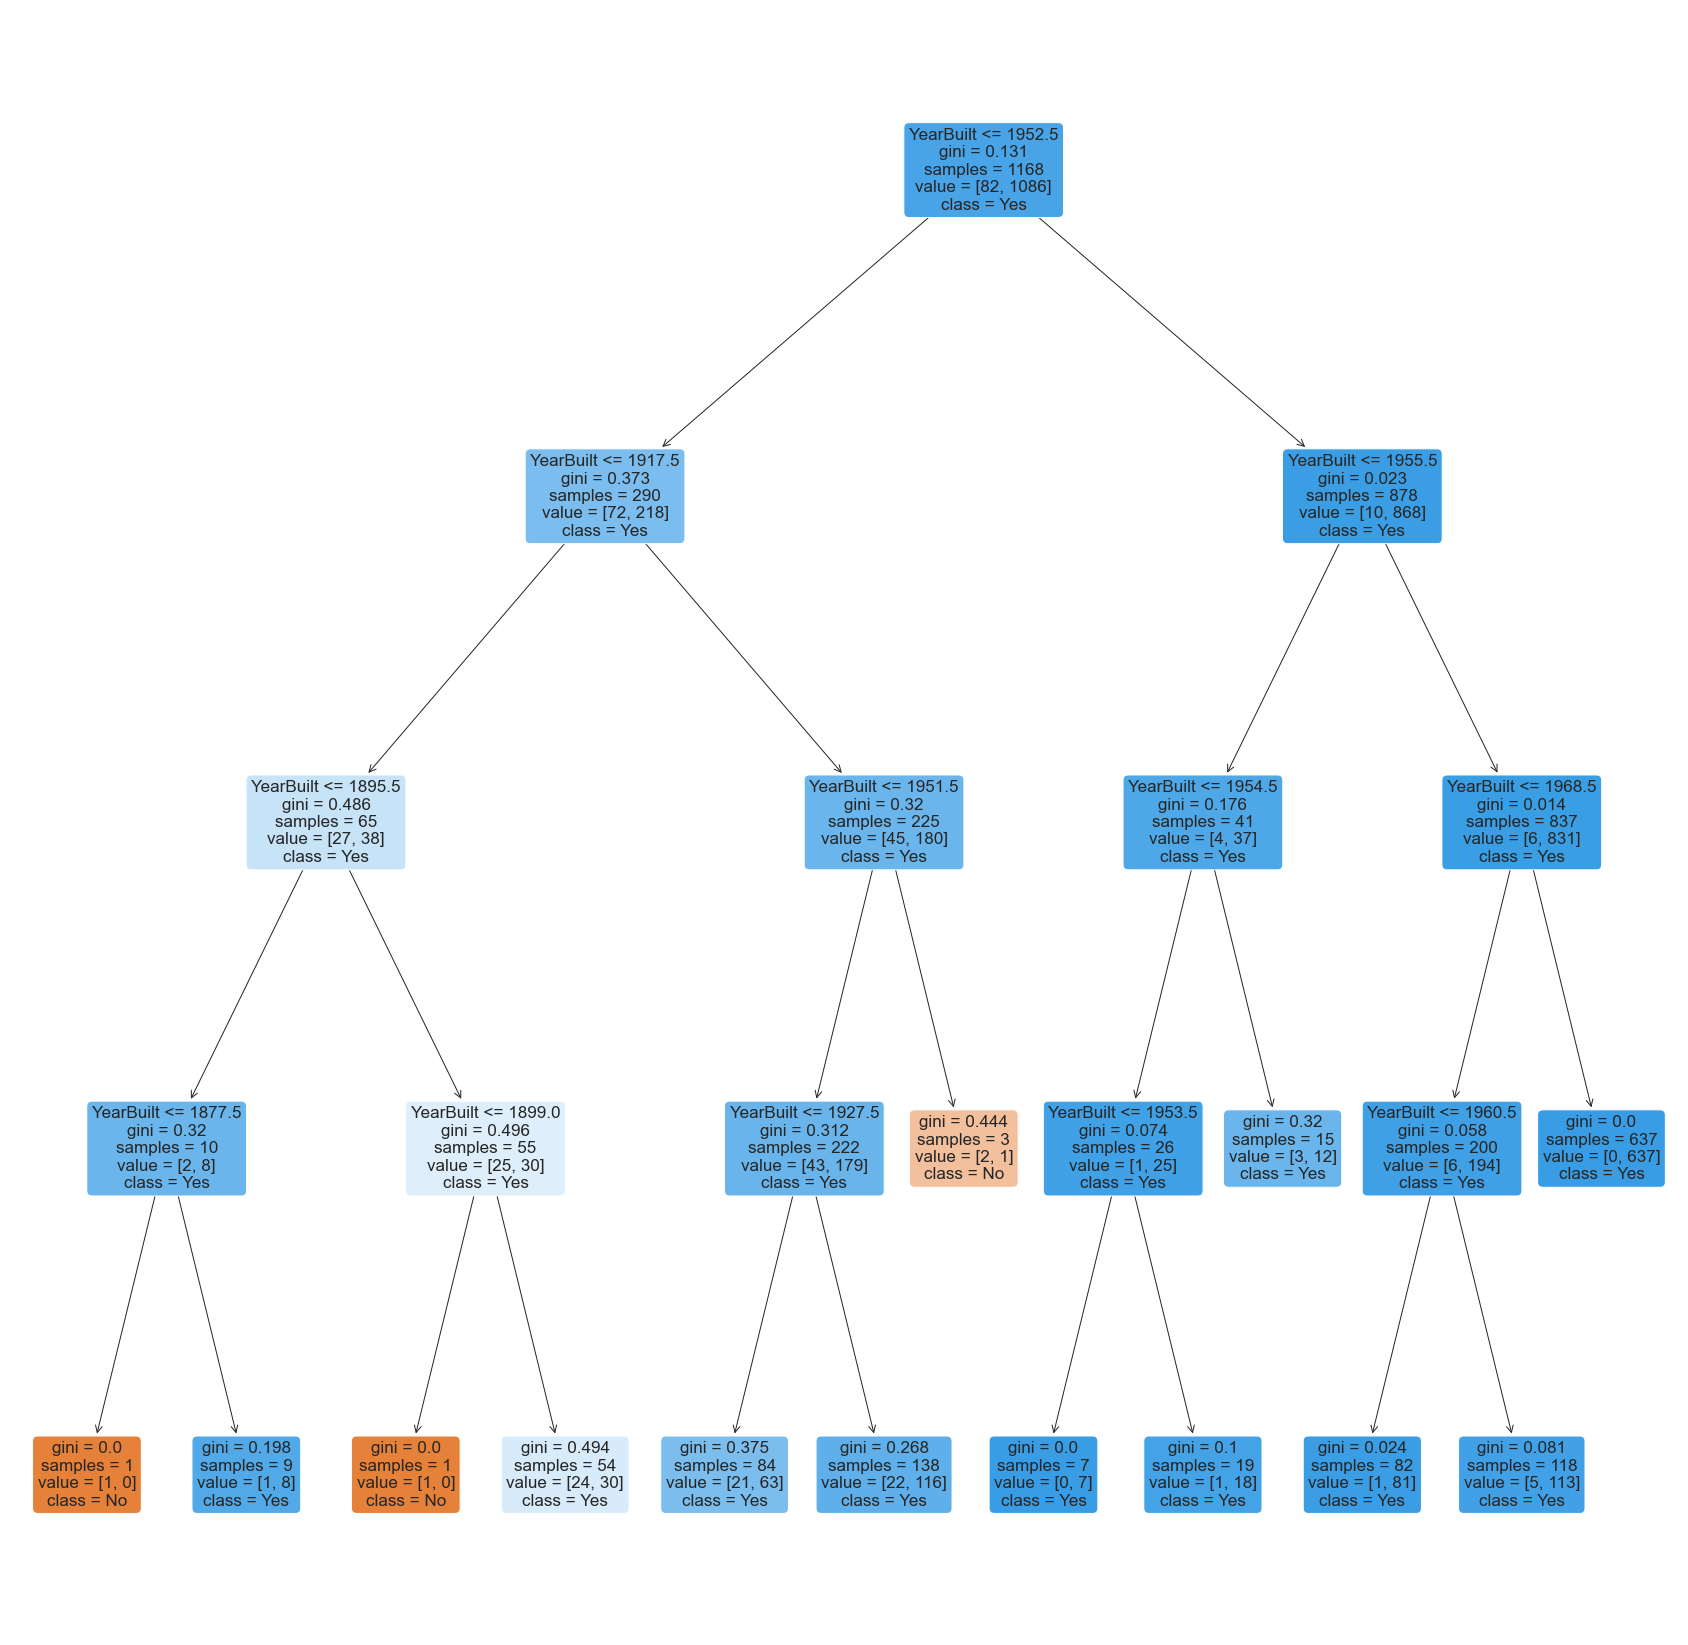

In [46]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["No","Yes"])

# Problem 3 : Understanding the Misclassified Samples
#### In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.
#### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.
#### (b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).
Hints and Pointers

o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again.

o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it.

o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples.

o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.

[Text(803.52, 1467.72, 'SalePrice <= 107700.0\ngini = 0.113\nsamples = 1168\nvalue = [70, 1098]\nclass = Yes'),
 Text(368.28, 1141.56, 'SalePrice <= 62750.0\ngini = 0.45\nsamples = 117\nvalue = [40, 77]\nclass = Yes'),
 Text(133.92, 815.4000000000001, 'SalePrice <= 45650.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No'),
 Text(66.96, 489.24, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Text(200.88, 489.24, 'SalePrice <= 53996.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(133.92, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(267.84, 163.08000000000015, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Text(602.64, 815.4000000000001, 'SalePrice <= 106125.0\ngini = 0.417\nsamples = 108\nvalue = [32, 76]\nclass = Yes'),
 Text(468.71999999999997, 489.24, 'SalePrice <= 103800.0\ngini = 0.397\nsamples = 99\nvalue = [27, 72]\nclass = Yes'),
 Text(401.76, 163.08000000000015, 'gini = 0.417\nsamples = 91\nvalue = 

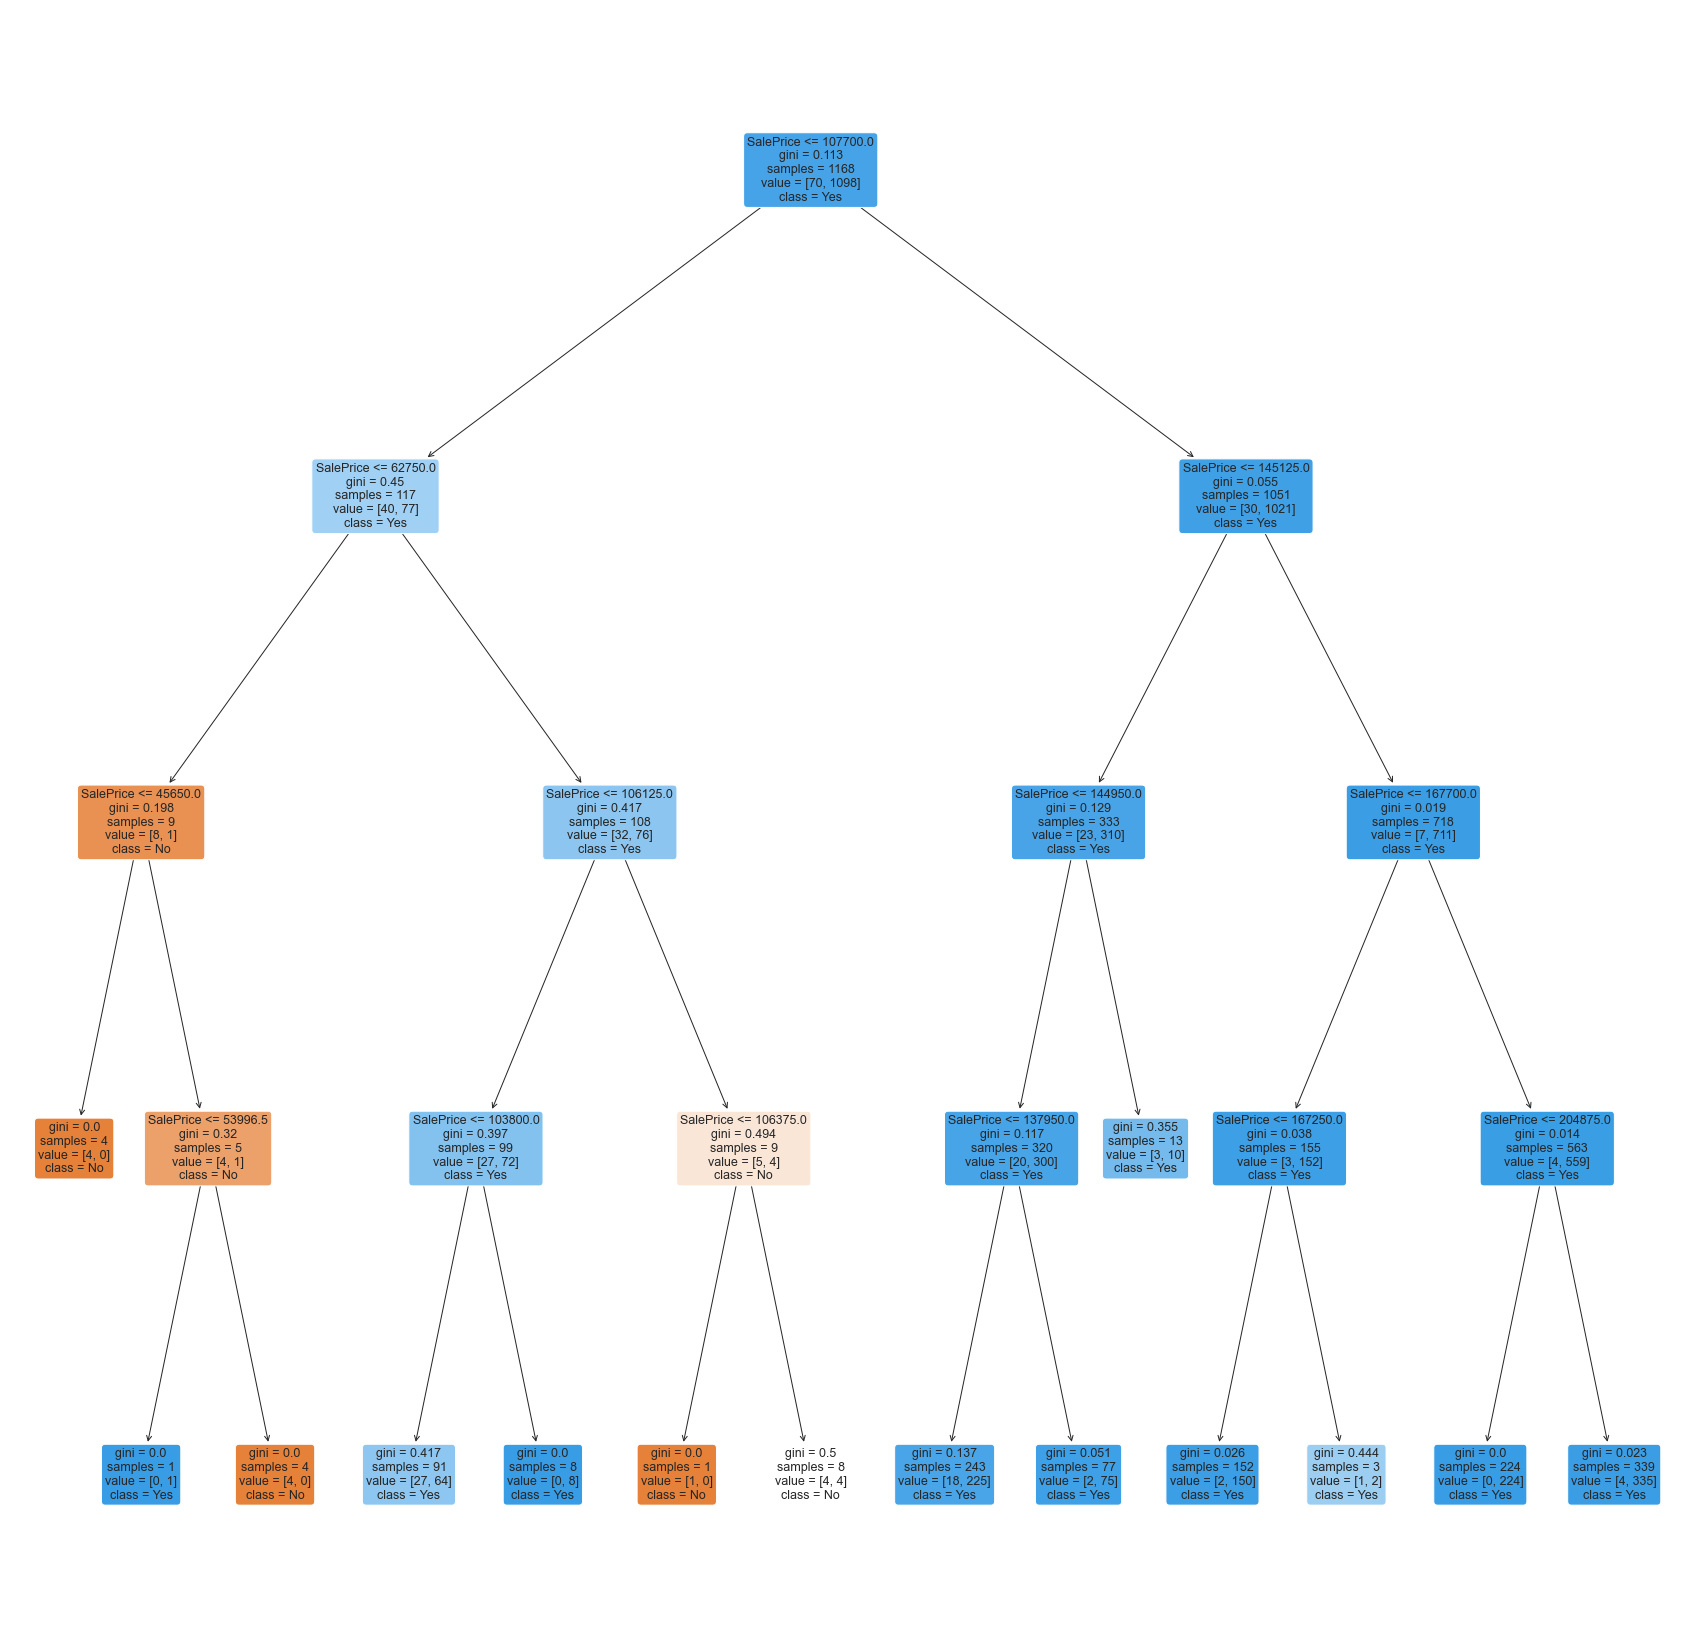

In [138]:
# Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

In [100]:
joint1 = pd.concat([SalePrice, CentralAir], axis = 1).reindex(SalePrice.index)
joint1

,SalePrice,CentralAir
0,208500,Y
1,181500,Y
2,223500,Y
3,140000,Y
4,250000,Y
...,...,...
1455,175000,Y
1456,210000,Y
1457,266500,Y
1458,142125,Y


In [165]:
filtered = X_train2[(X_train2['SalePrice']>62750) & (X_train2['SalePrice']<=103800)]
filtered

,SalePrice
430,85400
1086,83500
1049,84900
821,93000
210,98000
...,...
658,97500
431,79900
761,100000
250,76500


,SalePrice,CentralAir
17,90000,Y
29,68500,N
39,82000,N
61,101000,N
68,80000,Y
...,...,...
1378,83000,Y
1412,90000,N
1432,64500,Y
1449,92000,Y


In [169]:
falsePositive = filtered[(housedata['CentralAir'] == 'N')]
falsePositive
falsePositive.shape

C:\Users\NGHO0008\AppData\Local\Temp/ipykernel_12512/503401419.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  falsePositive = filtered[(housedata['CentralAir'] == 'N')]


(27, 1)